In [4]:
import pandas as pd
import numpy as np

#load the california housing data
df = pd.read_csv("housing.csv") 

df.describe()
df.info()


#total_bedrooms      20433 non-null  float64 - this feaure has missing values
#verified using df.isnull().sum()

#Fix it by, every missing total_bedrooms value was filled using the median value of that column’s values. median is used to rebust the skewness ( this column's data is skewed data) and outliers. 
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isnull().sum()

#To find which feature has largest variance
df = df.select_dtypes(include='number')
all_vars = df.var()
all_vars.idxmax(), all_vars.max() #ANSWER: median_house_value has largest variance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


('median_house_value', np.float64(13316148163.035278))

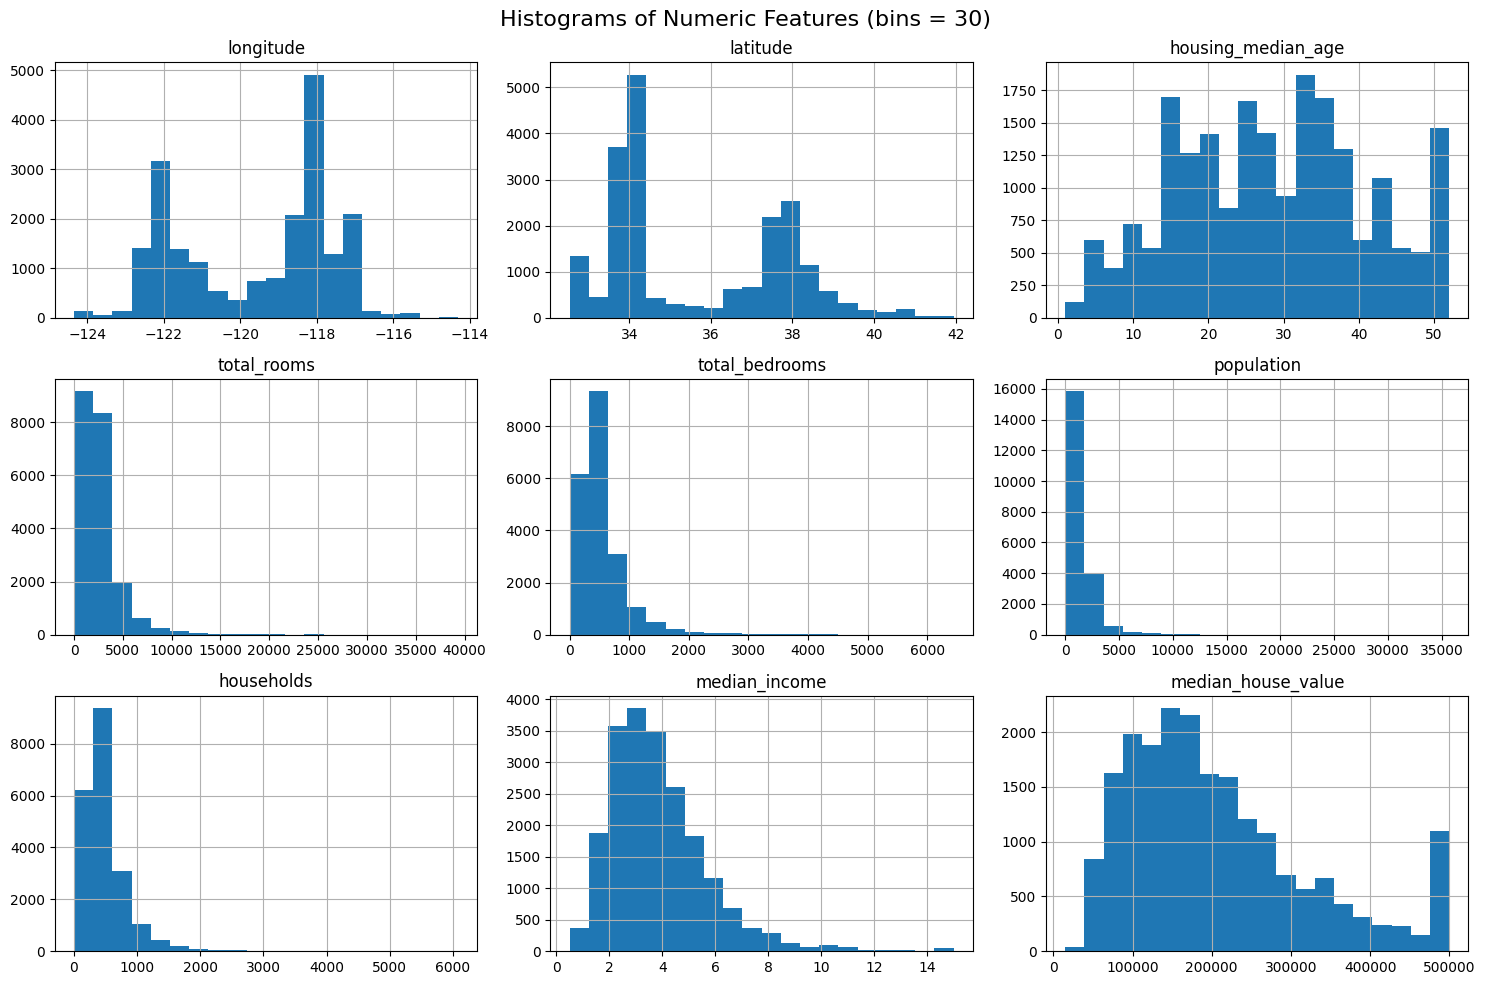

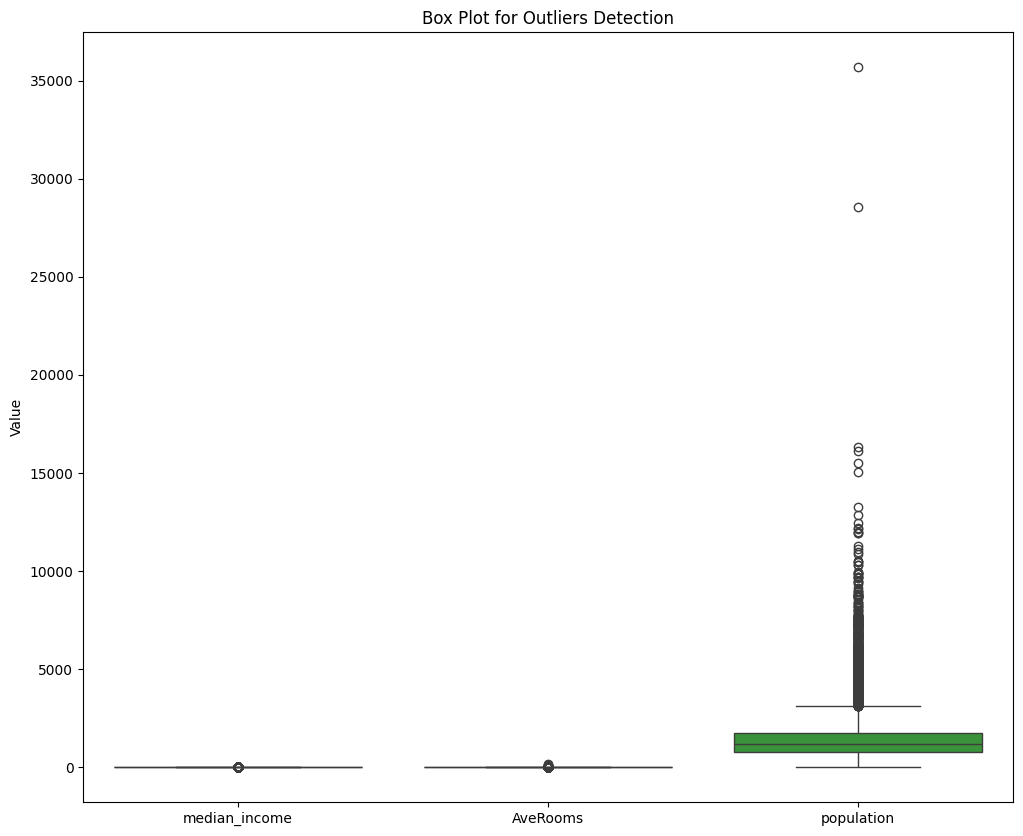

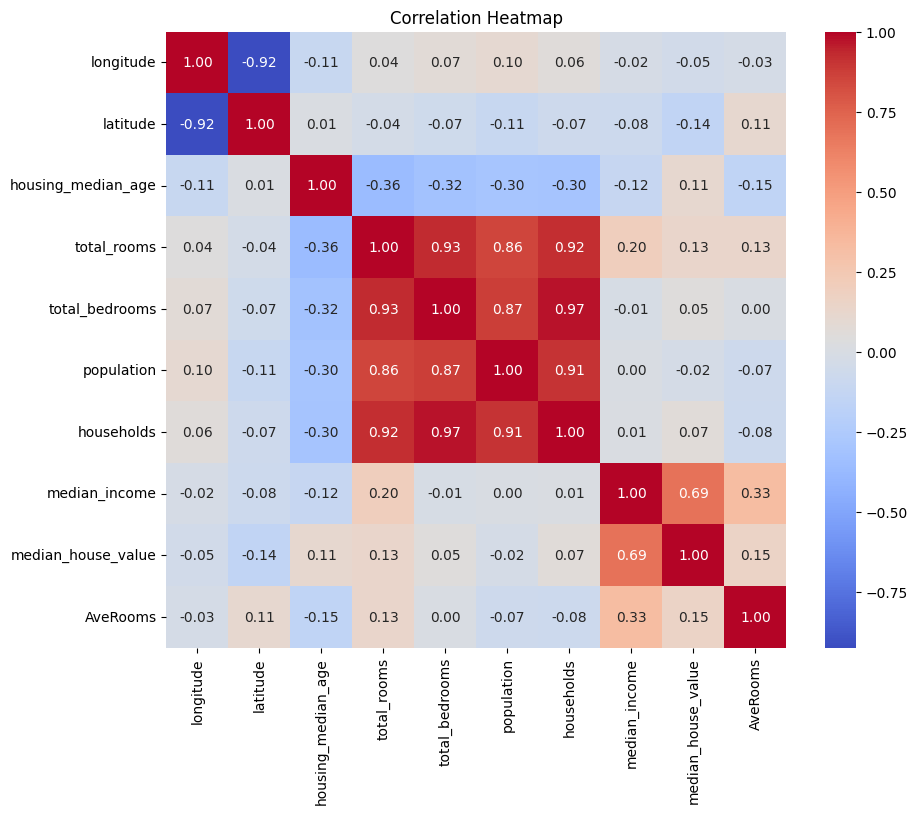

In [5]:
#TASK2: 
# Univariate Analysis (Histograms)
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------------------------------------------------------------------------------------#

df.hist(bins=20, figsize=(15,10)) #Tried with different bin sizes-> 30, 40, 80..
plt.suptitle("Histograms of Numeric Features (bins = 30)", fontsize=16)
plt.tight_layout()
plt.show()
#OBSERVATIONS FROM THE OUTPUT HISTOGRAM PLOTS:
'''
->Most of the features are skewed (long right tails/ more concentration at the lower values) -> plots of total_rooms, total_bedrooms, population, households are right skewed.
->This shows that features are non-normal distributed.
->The plots of longitude and latitude explains that most houses are located in two different regions.

METHODS TO ELIMINATE THE SKEWNESS.
->Skewness can be reduced by log transformation (log(x+1)), this method is best for right skewed data, it compresses larger values(positive values).
->squre-root(sqrt(x)): This method is also useful for positively skewed data, it stables the variance and makes the data similar to normally distributed which makes the analysis easier.
->box-cox, yeo-johnson(handles both positive and negative values) transforms can be used to remove skewness
->Trimming: we can remove the extreme outliers which are contributing significantly towards the skewness.
'''
#--------------------------------------------------------------------------------------------------------------#
#BOX plot
#create AveRooms field -> total rooms/ household
df['AveRooms'] = df['total_rooms'] / df['households']

plt.figure(figsize=(12,10))
sns.boxplot(data=df[['median_income', 'AveRooms', 'population']])
plt.title("Box Plot for Outliers Detection")
plt.ylabel("Value")
plt.show()
#OBSERVATIONS FROM THE BOX PLOT:
''' 
->Population has very high spread and is strongly right skewed, with many extreme high outliers
->Median_income and AveRooms show much smaller variability compared with population.
->Median_income and AveRooms both have only a few outliers, so their distributions are relatively compact and stable.
->Because population has many extreme high values, the model may overfocus on those rare cases and give less accurate predictions for the majority of normal observation.
'''
#---------------------------------------------------------------------------------------------------------------#

#correlation Heatmap
plt.figure(figsize=(10,8))
#correlation matrix
corr_mat = df.corr()

#heatmap of correlation matrix
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#---------------------------------------------------------------------------------------------------------------#


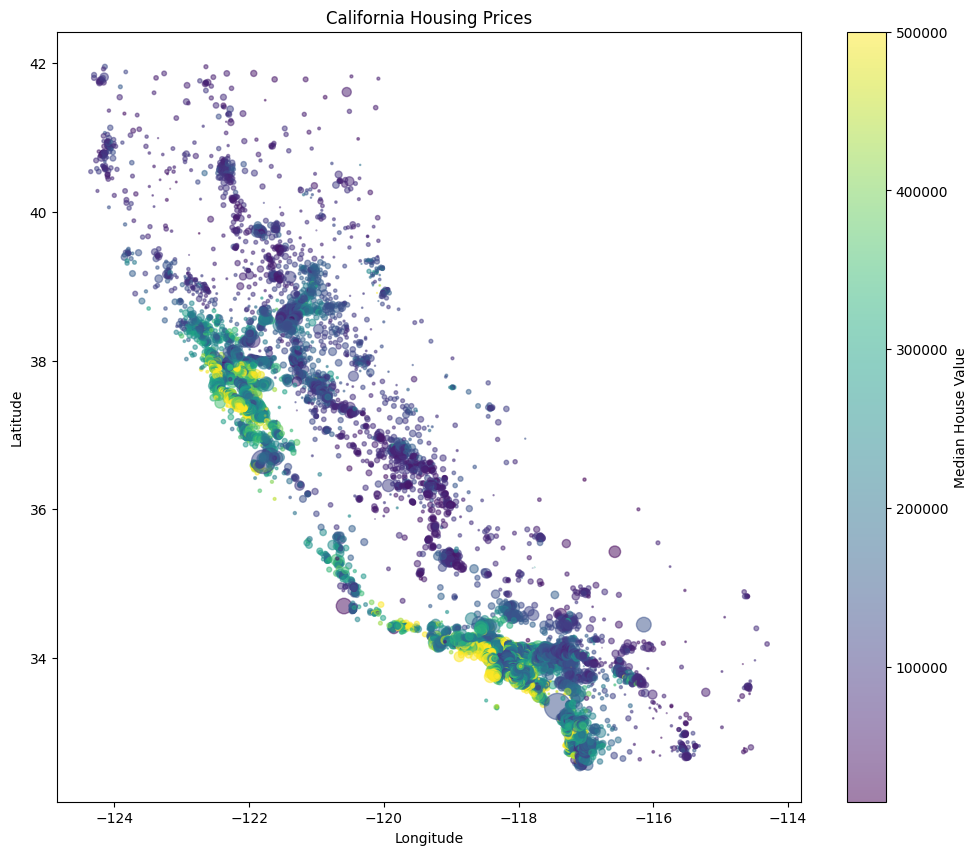

In [6]:
#Latitude/Longitude Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#SCATTER PLOT: Longitude vs Latitude
plt.figure(figsize=(12,10))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], s=df['population']/100, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices")
plt.show()
#obervation: Housing prices in California are higher near the coast and lower in inland areas, showing the strong impact of geographical location.
#Areas with higher population density (larger dots) are mostly found near the coast.

In [7]:
#TASK: Explain why scaling is required before PCA
'''
->PCA works by finding directions where the data varies the most. If one feature has very large values (like population) and another has small values (like median income), PCA will focus more on the large one.
->Without scaling, features with larger values dominate, even if they are not more important. This gives biased and incorrect principal components.
->Scaling puts all features on the same scale, so each feature gets a fair chance to contribute to PCA results.
'''

'\n->PCA works by finding directions where the data varies the most. If one feature has very large values (like population) and another has small values (like median income), PCA will focus more on the large one.\n->Without scaling, features with larger values dominate, even if they are not more important. This gives biased and incorrect principal components.\n->Scaling puts all features on the same scale, so each feature gets a fair chance to contribute to PCA results.\n'

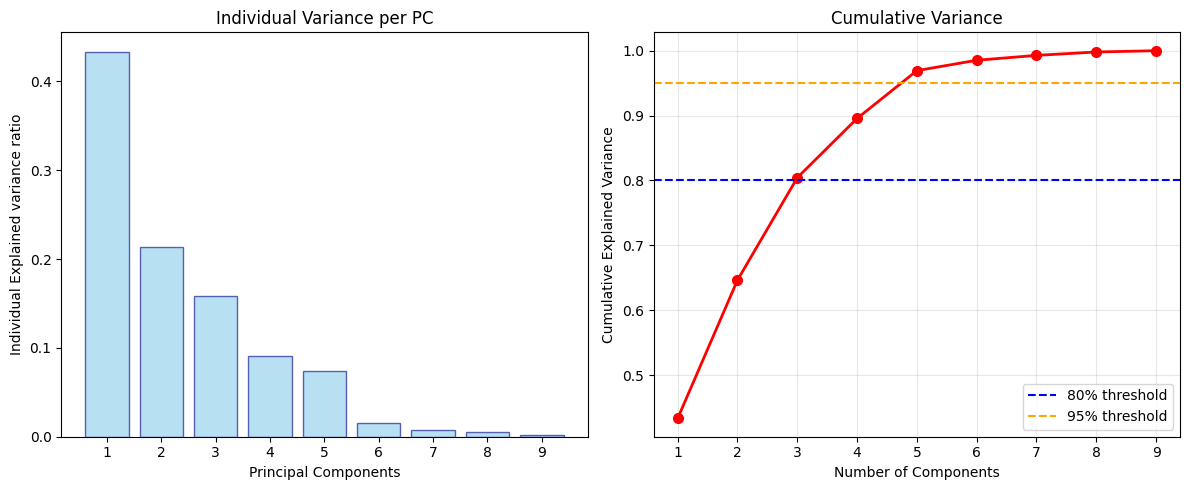

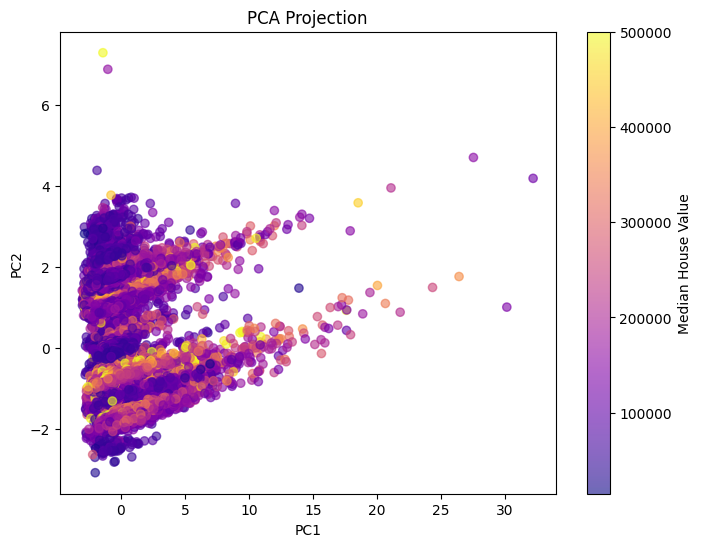

In [8]:
#Apply PCA on features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Step 1: scale the data (IMPORTANT STEP)
scaler = StandardScaler()

#we dropped med house value becaouse it is the output varibale, where the models learns from the data and produces the output, we med value isn't removed then model already knows the output and give false high accuracy outcome.
X = df.drop('median_house_value', axis=1)
medhouseval = df['median_house_value']

X_is_scaled = scaler.fit_transform(X)

#Step 2: now apply pca
pca = PCA()
pca_applied = pca.fit_transform(X_is_scaled)

#plot explained variance ratio
var_ratio = pca.explained_variance_ratio_ #indiviadual var per principle component
cum_var = np.cumsum(var_ratio)            #cumulative var

plt.figure(figsize=(12,5))

#subplot1 individual variance 
plt.subplot(1,2,1)
plt.bar(range(1,len(var_ratio)+1), var_ratio,alpha = 0.6, color='skyblue', edgecolor='navy')
plt.xlabel('Principal Components')
plt.ylabel('Individual Explained variance ratio')
plt.title('Individual Variance per PC')
plt.xticks(range(1,len(var_ratio)+1))

#subplot2 cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cum_var)+1), cum_var, 'ro-', linewidth=2, markersize=7)
plt.axhline(y=0.8, color='b', linestyle='--', label='80% threshold')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
"""
DIFFERENCE BETWEEN INDIVIDUAL vs CUMULATIVE:

INDIVIDUAL:
-> Shows % of TOTAL variance captured by EACH principal component
-> PC1 captures 37%, PC2 18%, PC3 12%,...
-> First few PCs are most important individually.
-> We can identify which single components matter most

CUMULATIVE:
-> Running total: PC1 + PC2 + ... + PCn
-> Shows % of TOTAL variance captured by first n components
-> Helps decide "how many PCs needed for 80/90% variance"
-> Use case: Dimensionality reduction decisions

example:
-> individual: [0.37, 0.18, 0.12, 0.08, ...] 
-> Cumulative: [0.37, 0.55, 0.67, 0.75, ...] -> Here 2 PCs are needed for 55% variance
"""
#----------------------------------------------------------------------------------------------#

#choose top 2 components
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(X_is_scaled)

plt.figure(figsize=(8,6))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=df['median_house_value'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Median House Value')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()




Correlation with median_house_value:
median_house_value    1.000000
median_income         0.688075
AveRooms              0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


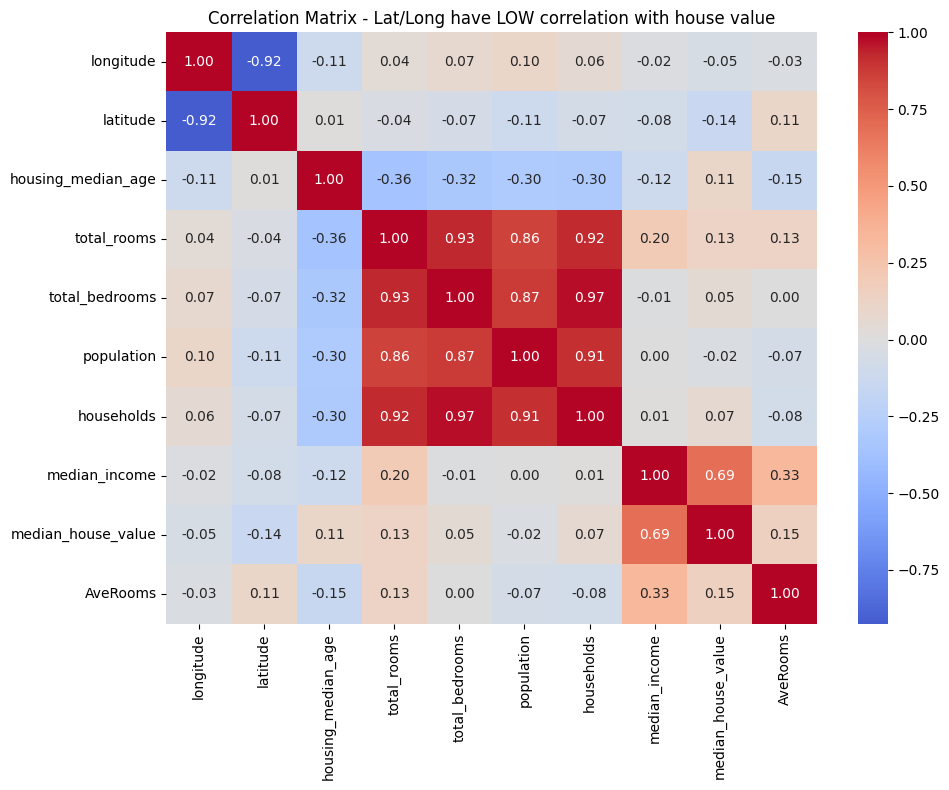


Training set and Test set: (16512, 7), (4128, 7)
              Feature    Coefficient
0  housing_median_age   23751.906028
1         total_rooms  -41502.493411
2      total_bedrooms   46425.019446
3          population  -40540.974163
4          households   42666.162233
5       median_income   91835.222232
6            AveRooms   -2432.618847
7           Intercept  207194.693738
MSE: 5978306134.447237
MAE: 56756.69210393689
R²: 0.5437831826768657
Adjusted R²: 0.5430080570163652


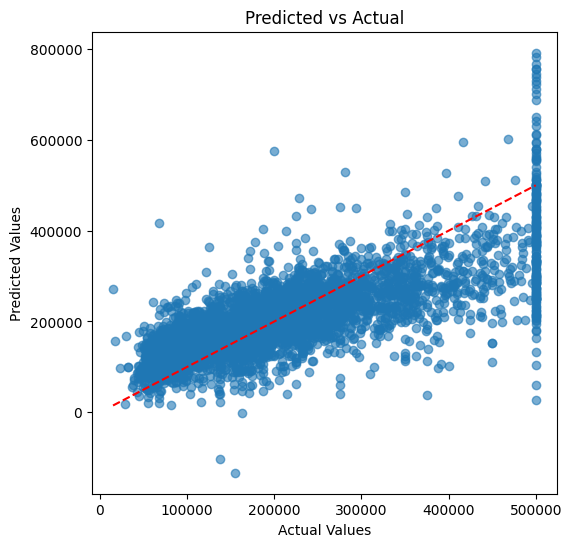

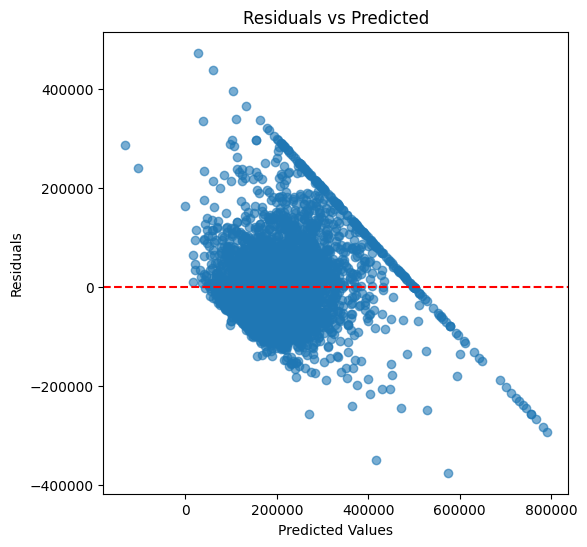

In [9]:
#MULTIPLE LINEAR REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
#---------------------------------------------------------------------------------#
#1. Why we Excluded latitude and longitude Features?
#Justification for why we are excluding lat/long using Correlation matrix
corr_matrix = df.corr()
print("Correlation with median_house_value:")
relevant_corrs = corr_matrix['median_house_value'].sort_values(ascending=False)
print(relevant_corrs)

#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Lat/Long have LOW correlation with house value')
plt.tight_layout()
plt.show()

"""
-> Med Incom: +0.68 (STRONG positive -> Imp predictor)
-> Latitude: -0.14 (WEAK negative)
-> Longitude: -0.05 (VERY WEAK negative) 
-> Lat,Long encode geography, not causal price factors
-> Hence we exclude them for interpretable economic model
"""
#----------------------------------------------------------------------------------#

features = df.drop(['median_house_value','latitude', 'longitude'], axis=1)
target_variable = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

print(f"\nTraining set and Test set: {X_train.shape}, {X_test.shape}")
#create a pipeline
linreg_pipeline = Pipeline([('scaler', StandardScaler()), ('linreg_model', LinearRegression())])
linreg_pipeline.fit(X_train, y_train)

#print coefficients-intercept matrix
coefficients = linreg_pipeline.named_steps['linreg_model'].coef_
intercept = linreg_pipeline.named_steps['linreg_model'].intercept_

coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient':coefficients})
intercept_df = pd.DataFrame({'Feature':['Intercept'], 'Coefficient':[intercept]})
coef_intercept_matrix = pd.concat([coef_df, intercept_df], ignore_index=True)
print(coef_intercept_matrix)
#---------------------------------------------------------------------------------#

#evaluation of model on metrics of mse, mae loss, R^2 score , adjusted R^2 score
y_pred = linreg_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0] #number of data points
k = X_test.shape[1] #number of features(Independent variables)
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"Adjusted R²: {adj_r2}")

""" 
IS HIGH R2 SCORE ALWAYS GOOD?
ANSWER: NO, Sometimes a high R square value can be misleadiing and it may also indicates overfitting. The model may work well on training data but it will fail when we give new data. The important point to to generalise the model to perform well on unseen data rather than the data it is trained on

IS LOW TRAINING LOSS ALWAYS PREFERRED?
ANSWER: NO, low training loss means the odel may be learning noise.
low training loss and high validation loss is a sign of overfitting.
"""

#plots: Predicted vs actual 
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()

#plot: residuals vs Predicted values
residuals = y_test - y_pred
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [10]:
#BONUS PART
#TRAIN RIDGE(L2 Regularization) AND LASSO(L1 Regularization) REGRESSION 
from sklearn.linear_model import Ridge, Lasso

x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']